# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [22]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

# Displaying Images

In [2]:
picture_size = 150
folder_path = "D:\\IntelDatasetforIC\\"

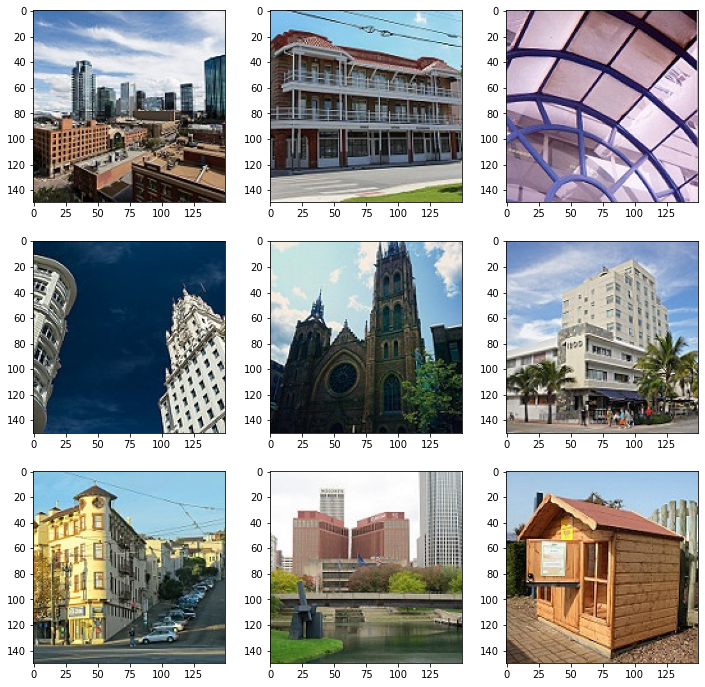

In [5]:
entity = 'buildings'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"seg_train/"+"seg_train/"+entity+"/"+
                  os.listdir(folder_path+"seg_train/"+"seg_train/"+entity)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [13]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"seg_train\seg_train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"seg_test\seg_test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Model Building

In [19]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 6

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      640       
                                                                 
 batch_normalization_12 (Bat  (None, 150, 150, 64)     256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 128)      

# Fitting the Model with Training and Validation Data 

In [20]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


C:\Users\dhvan\AppData\Local\Temp\ipykernel_6156\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


109/109 [==============================] - 1423s 13s/step - loss: 0.9040 - accuracy: 0.6549 - val_loss: 2.4306 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 2/48
109/109 [==============================] - 1353s 12s/step - loss: 0.6256 - accuracy: 0.7710 - val_loss: 1.1527 - val_accuracy: 0.6787 - lr: 0.0010
Epoch 3/48
109/109 [==============================] - 1358s 12s/step - loss: 0.5306 - accuracy: 0.8066 - val_loss: 1.0800 - val_accuracy: 0.6963 - lr: 0.0010
Epoch 4/48
109/109 [==============================] - 1430s 13s/step - loss: 0.4701 - accuracy: 0.8278 - val_loss: 2.5612 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 5/48
109/109 [==============================] - 1342s 12s/step - loss: 0.4308 - accuracy: 0.8426 - val_loss: 2.0484 - val_accuracy: 0.4552 - lr: 0.0010
Epoch 6/48
109/109 [==============================] - 1269s 12s/step - loss: 0.3915 - accuracy: 0.8565 - val_loss: 0.5184 - val_accuracy: 0.8145 - lr: 0.0010
Epoch 7/48
109/109 [==============================] - 1270s 12s

# Plotting Accuracy & Loss

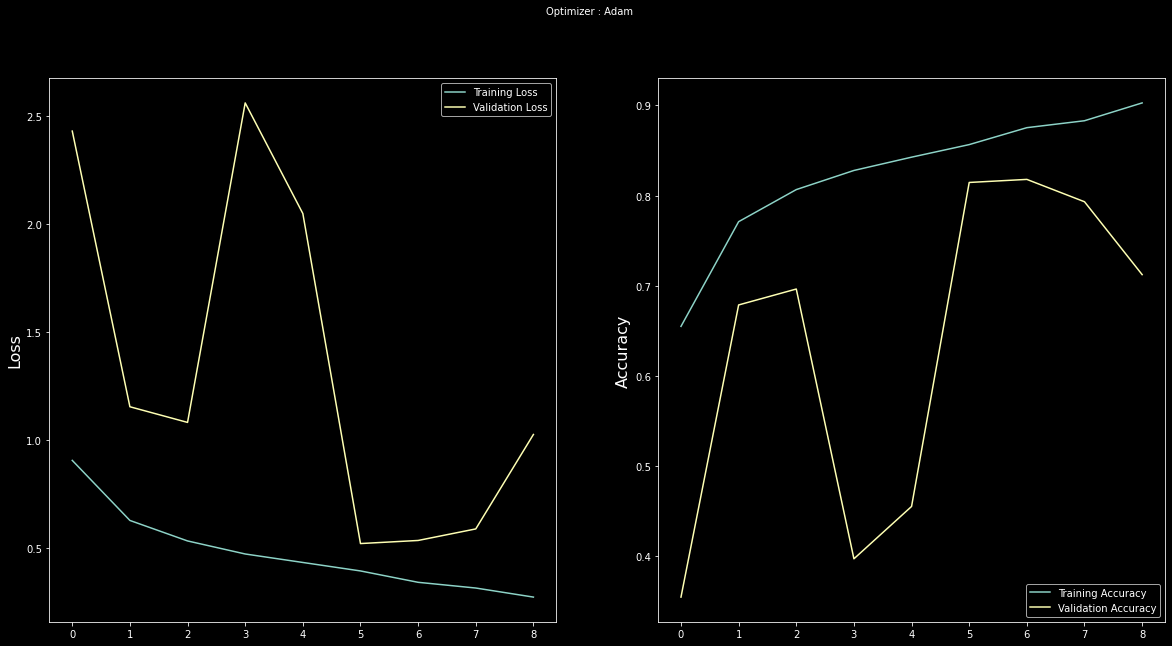

In [23]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

24/24 [==============================] - 55s 2s/step


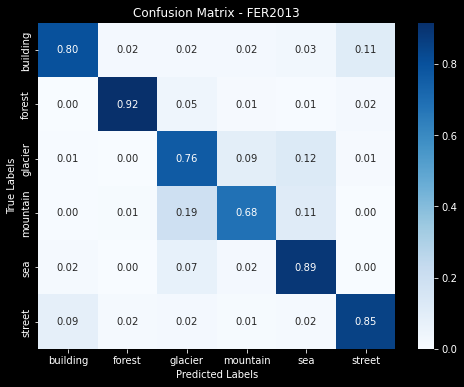

In [24]:
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

emotions = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']

test_labels = test_set.classes
test_labels = to_categorical(test_labels)

# Convert y_pred to integer labels


# Convert test_labels to integer labels
test_labels = np.argmax(test_labels, axis=1)

predictions = model.predict(test_set)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix - FER2013')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')

# Print the scores
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Precision: 0.8254
Recall: 0.8180
F1 Score: 0.8192
